download dataset from :-https://www.kaggle.com/mlg-ulb/creditcardfraud 

# Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab 
from random import sample 
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Reading Data

In [4]:
data=pd.read_csv("creditcard.csv")

**Class1 for fraudulent transactions, 0 otherwise**

# EDA

## Overall Data Distribution

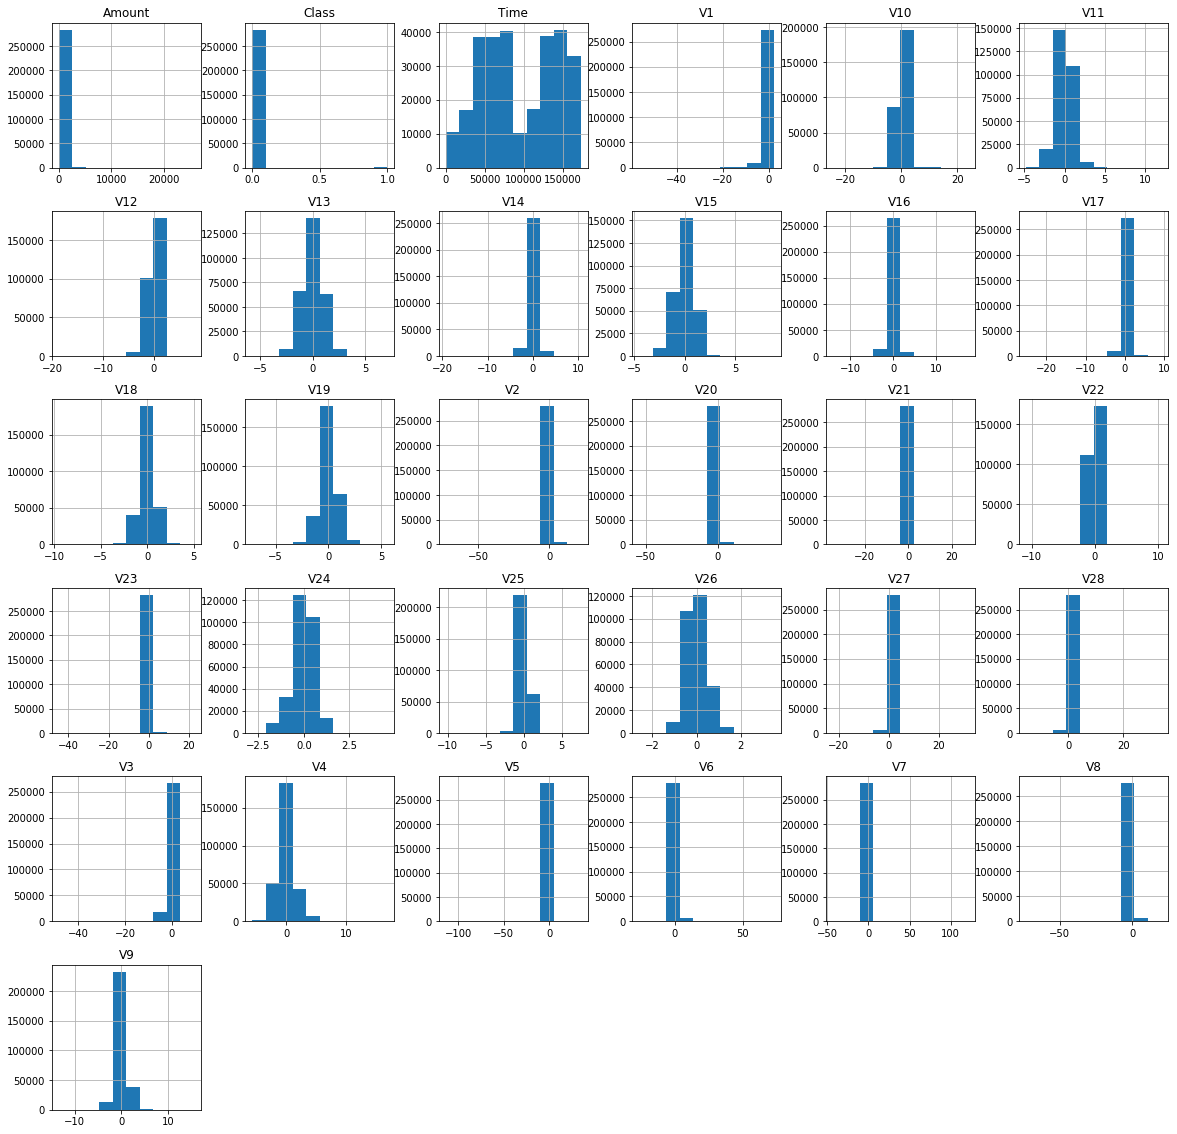

In [5]:
data.hist(figsize=(20,20))
plt.show()

In [6]:
# no. of fraud cases and  no. valid(genuine)  cases
fraud=data[data['Class'] == 1]
valid=data[data['Class'] == 0]

print("Fraud cases:",len(fraud)," ","valid cases:",len(valid))

Fraud cases: 492   valid cases: 284315


## Fraud Data

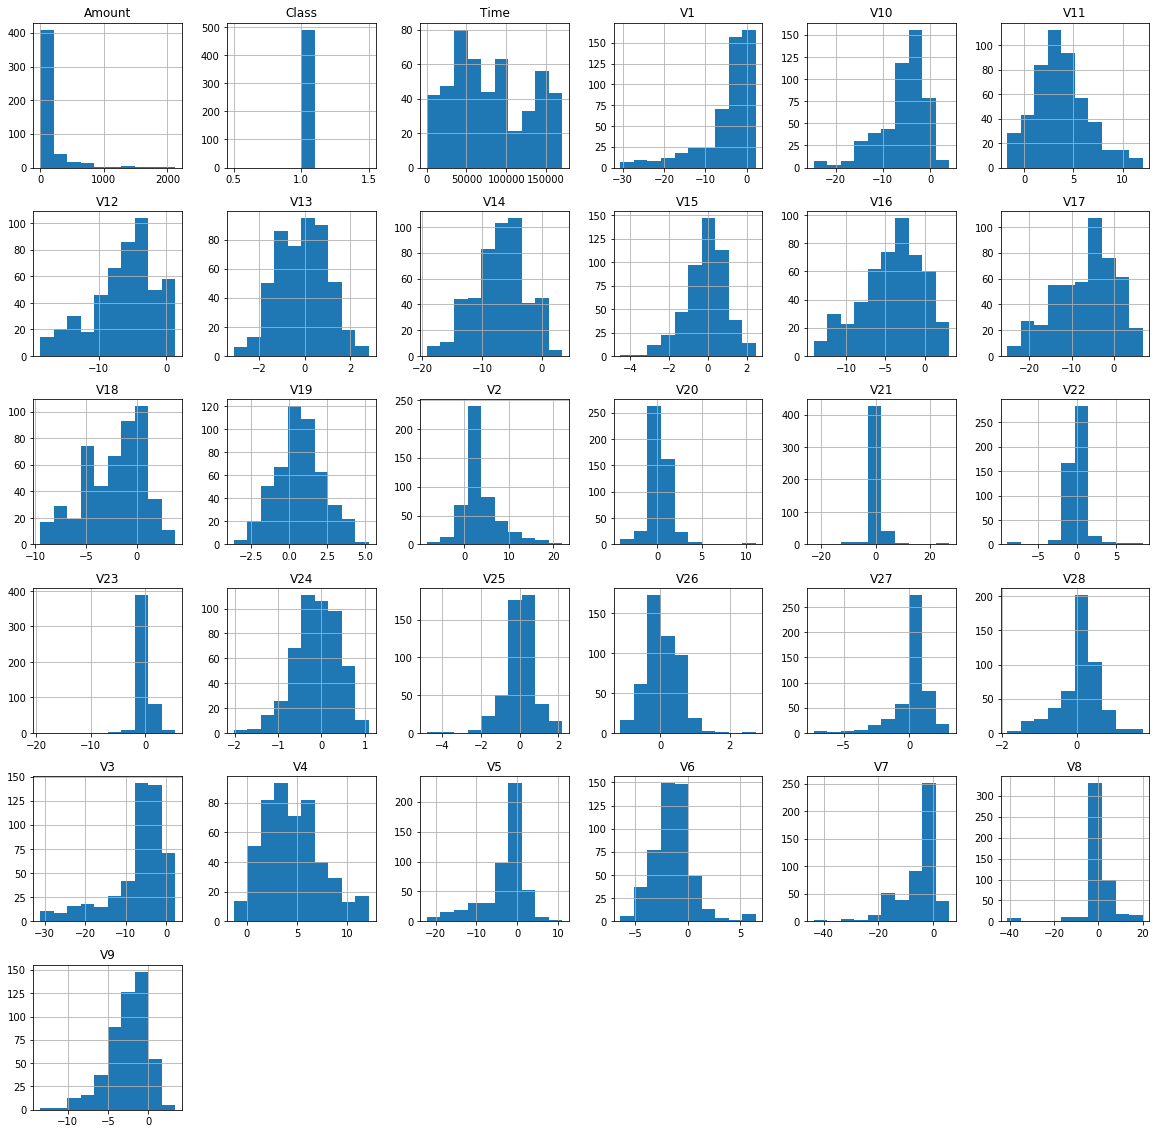

In [7]:
fraud.hist(figsize=(20,20))
plt.show()

## Normal Data

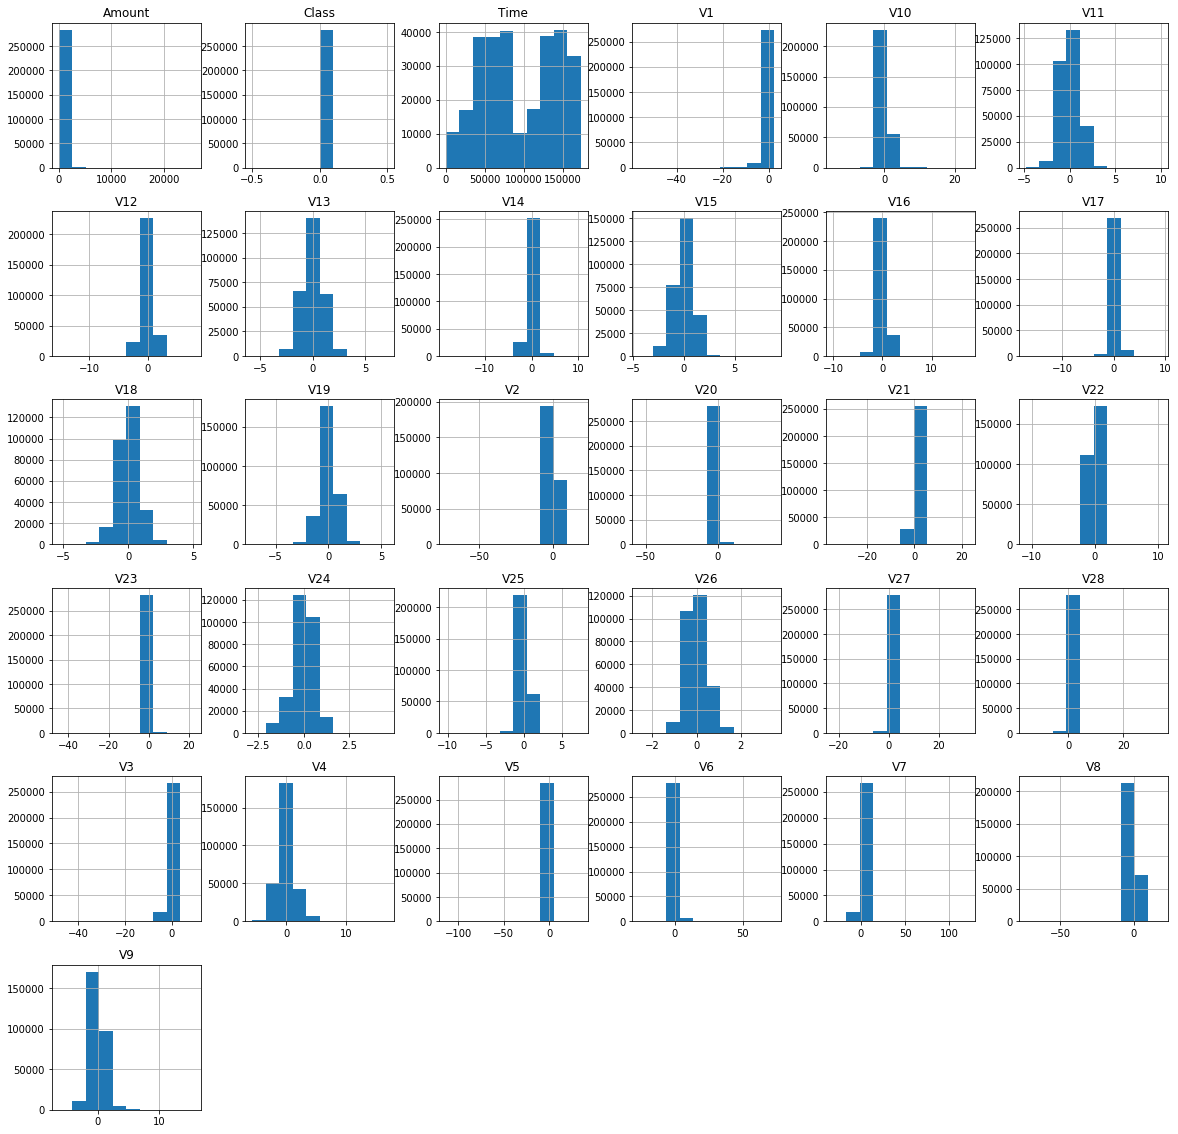

In [8]:
valid.hist(figsize=(20,20))
plt.show()

# EDA

In [9]:
data.isnull().sum() #Checking if dataset contains  missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
print(f"Maximum amount transacted during fraudulent time: {max(fraud.Amount)} Euro")
print(f"Maximum amount transacted during non fraudulent time: {max(valid.Amount)} Euro")

Maximum amount transacted during fraudulent time: 2125.87 Euro
Maximum amount transacted during non fraudulent time: 25691.16 Euro


### Q-Q plots

Time


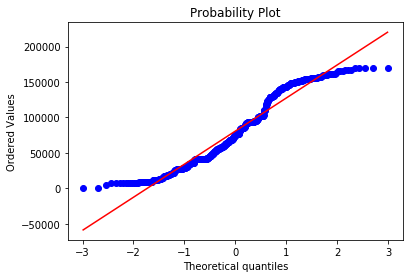

V1


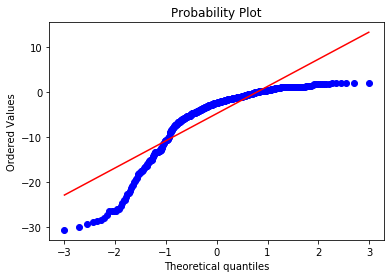

V2


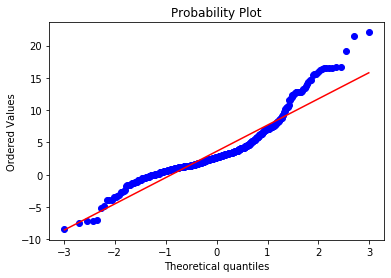

V3


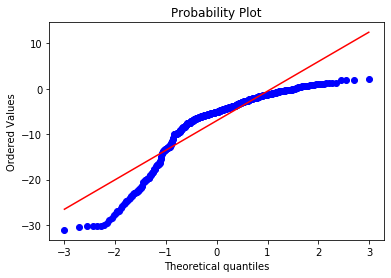

V4


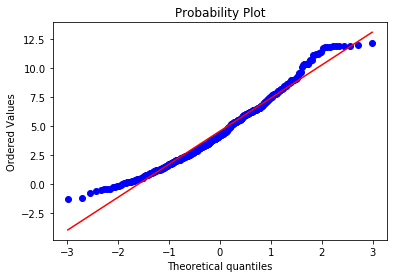

V5


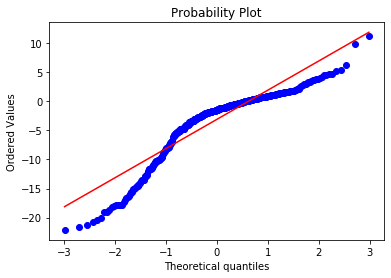

V6


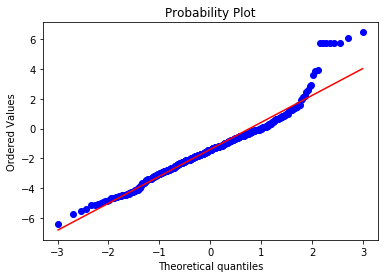

V7


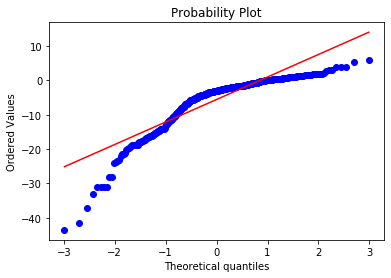

V8


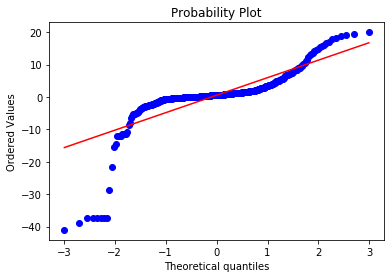

V9


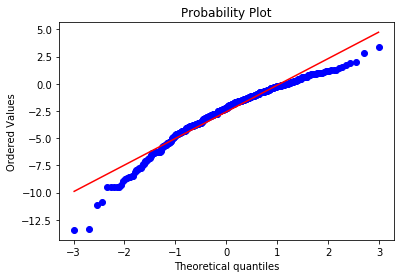

V10


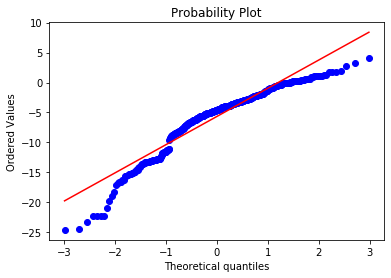

V11


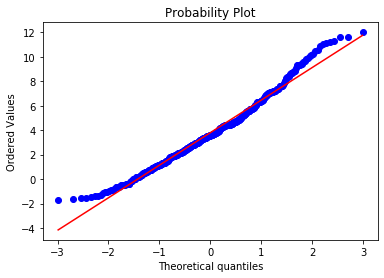

V12


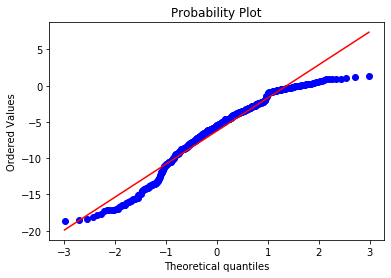

V13


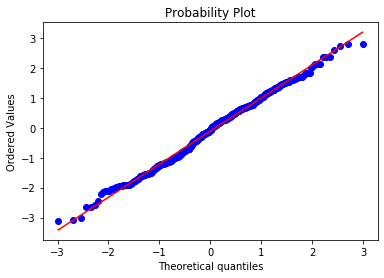

V14


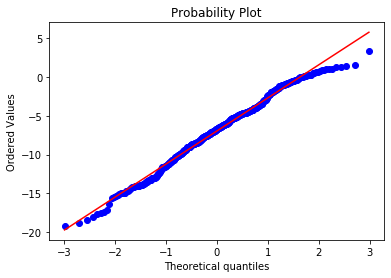

V15


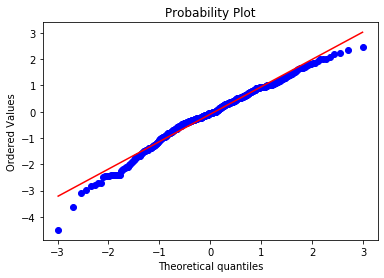

V16


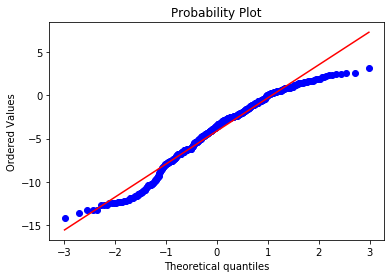

V17


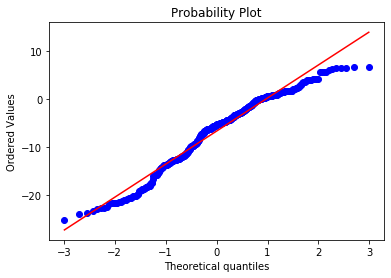

V18


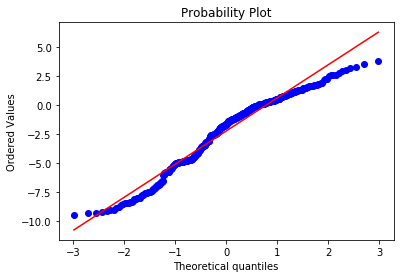

V19


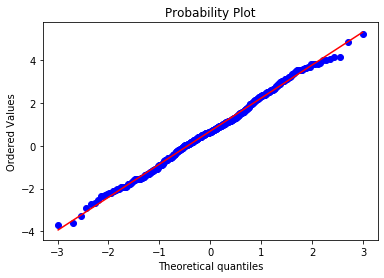

V20


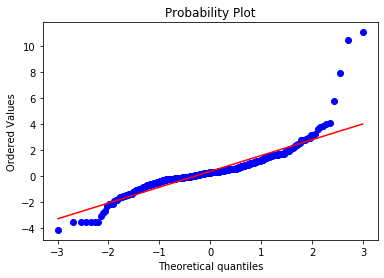

V21


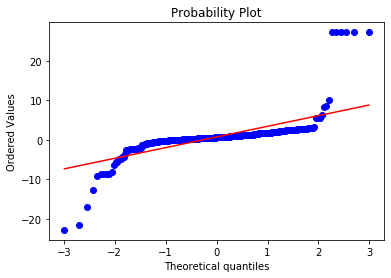

V22


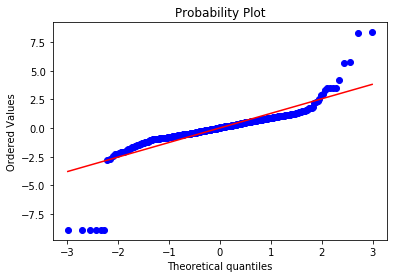

V23


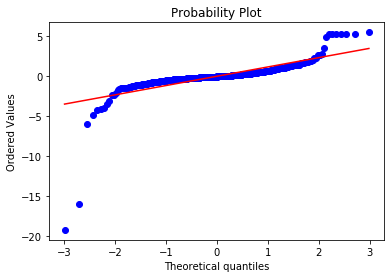

V24


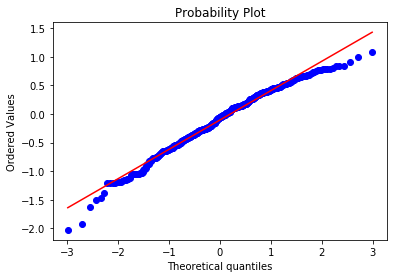

V25


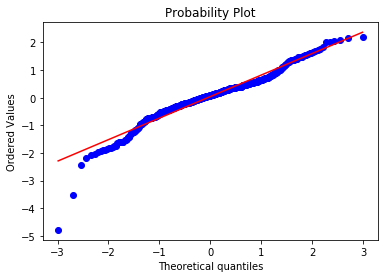

V26


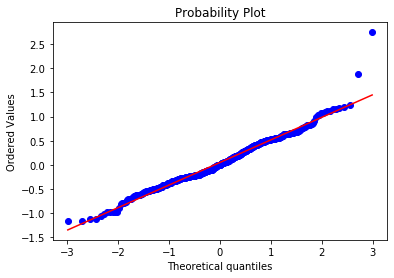

V27


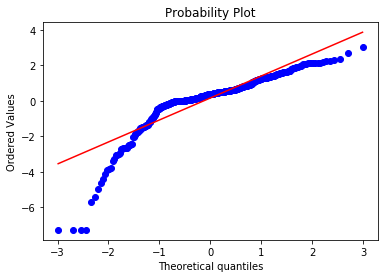

V28


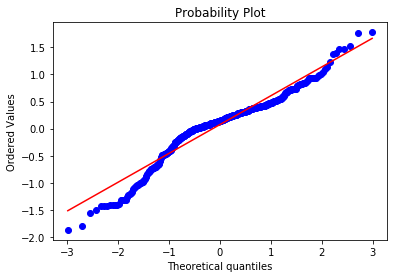

Amount


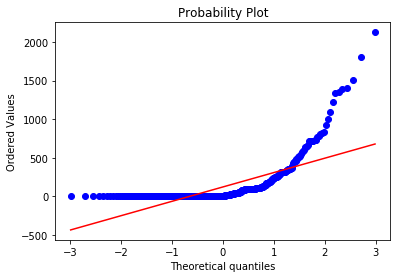

Class


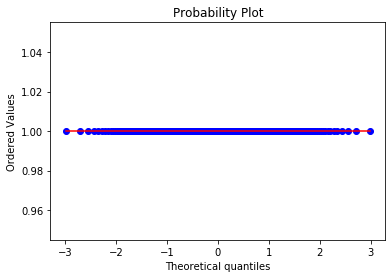

In [11]:
for col in data.columns:
    print(col)
    stats.probplot(fraud[col], dist="norm",plot = pylab)
    pylab.show()

Time


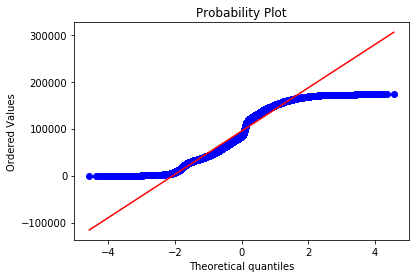

V1


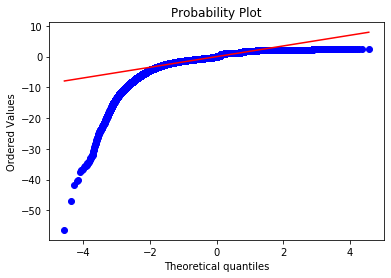

V2


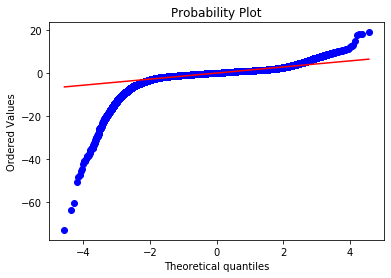

V3


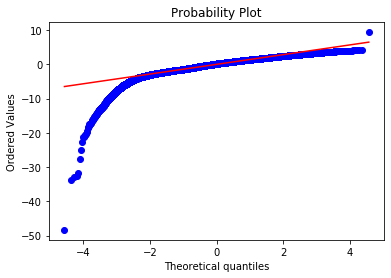

V4


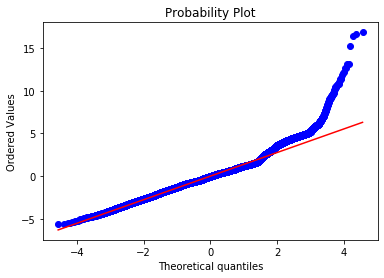

V5


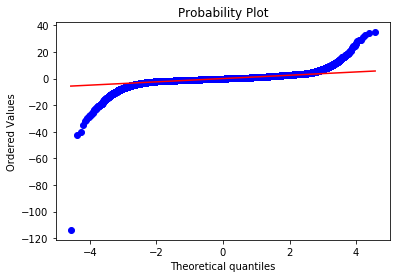

V6


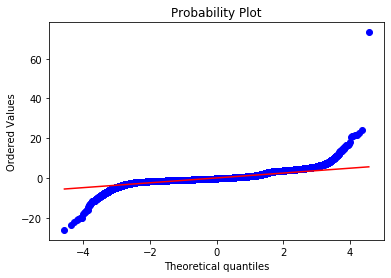

V7


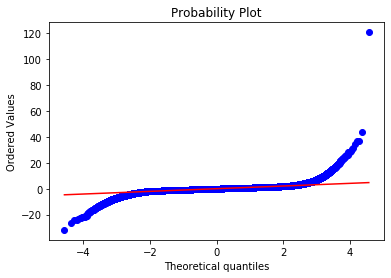

V8


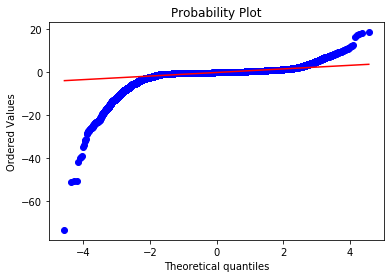

V9


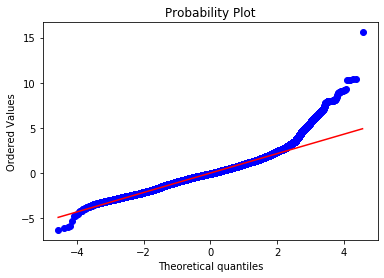

V10


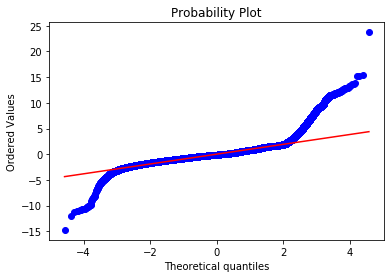

V11


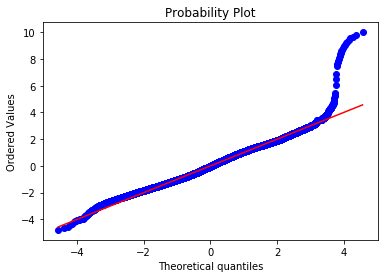

V12


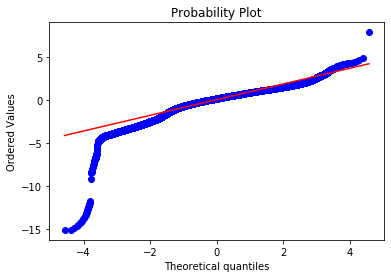

V13


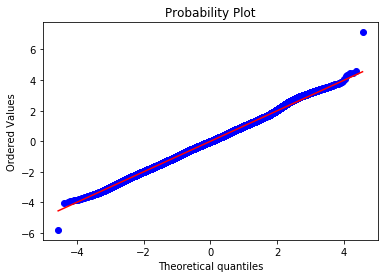

V14


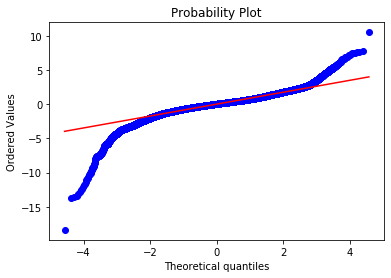

V15


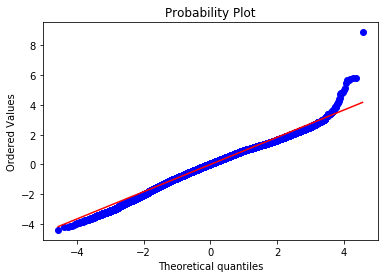

V16


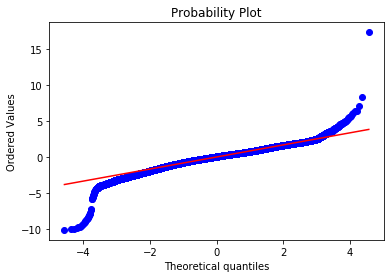

V17


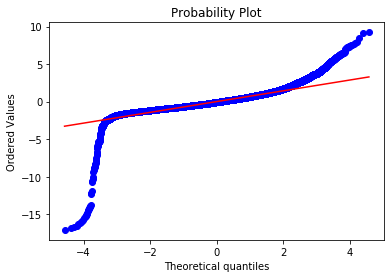

V18


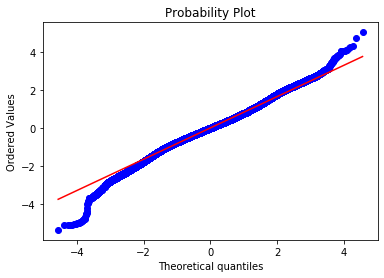

V19


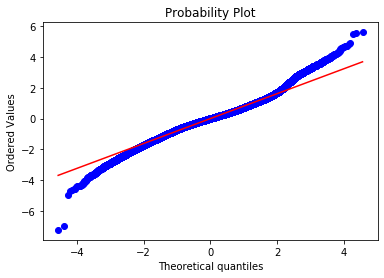

V20


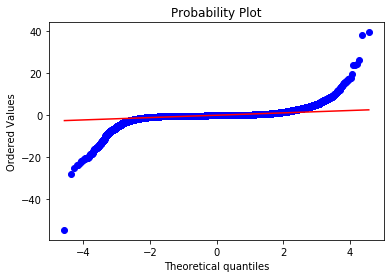

V21


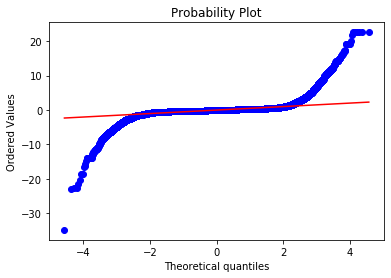

V22


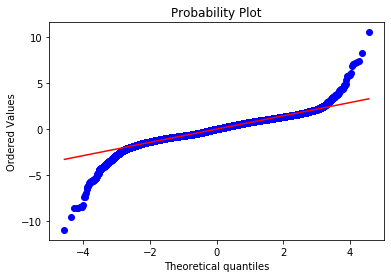

V23


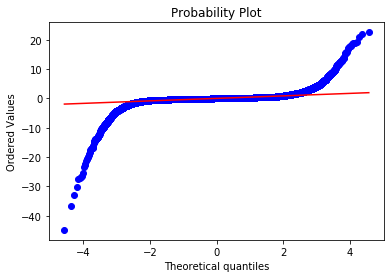

V24


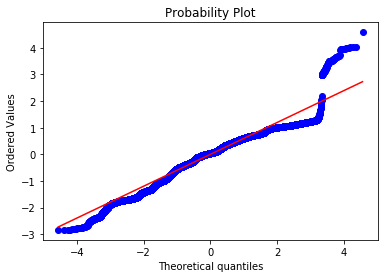

V25


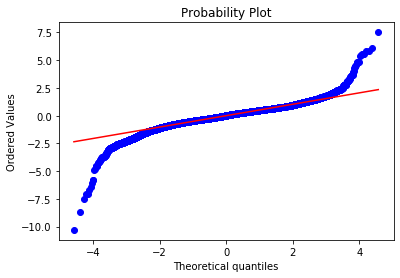

V26


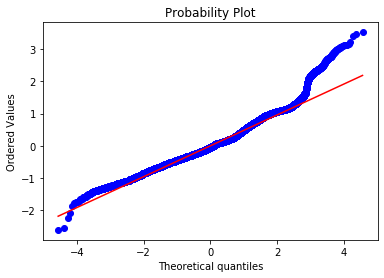

V27


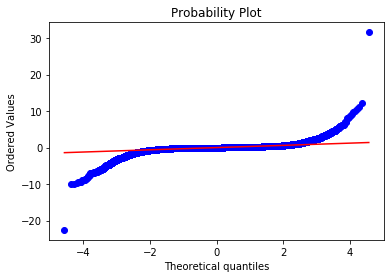

V28


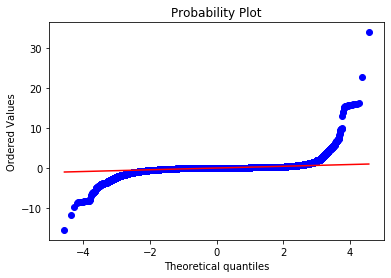

Amount


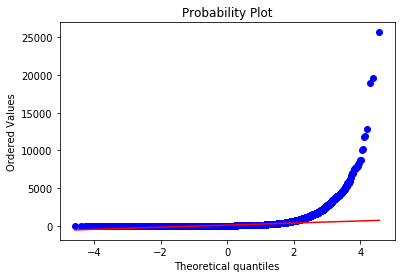

Class


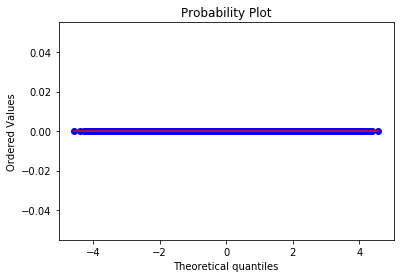

In [12]:
for col in data.columns:
    print(col)
    stats.probplot(valid[col], dist="norm",plot = pylab)
    pylab.show()

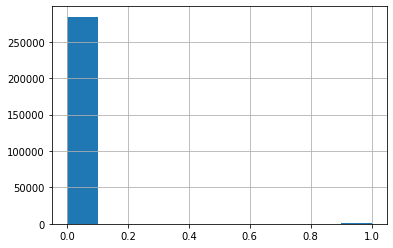

In [13]:
data['Class'].hist()
plt.show()

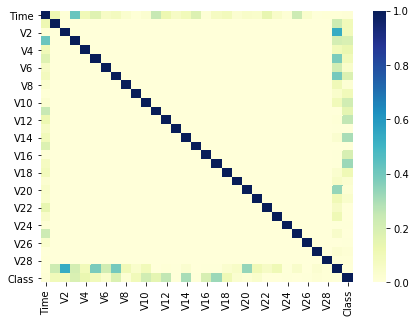

In [14]:
corr_mat = data.corr().abs()
plt.figure(figsize=(7,5))
sns.heatmap(corr_mat, cmap="YlGnBu")
plt.savefig("heatmap of data.png")
plt.show()

In [15]:
headers=list(data.columns)
print(headers,end=" ")

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'] 

# Making Balanced Dataset

In [16]:
x_valid = sample(valid[headers[:-1]].values.tolist(), 500)
y_valid = sample(valid[headers[-1]].values.tolist(),500)
x_fraud = fraud[headers[:-1]].values.tolist()
y_fraud = fraud[headers[-1]].values.tolist()
                

In [17]:
X, Y = [],[]

In [18]:
len(x_valid)

500

In [19]:
X.extend(x_valid)

X.extend(x_fraud)

Y.extend(y_valid)

Y.extend(y_fraud)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_train = y_train.reshape((y_train.shape[0],1))
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0],1))

In [23]:
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

(793, 30)
(199, 30)
(793, 1)
(199, 1)


In [24]:
print("No. of valid samples in train:",len(y_train[y_train == 0]))
print("No. of fraud samples in train:",len(y_train[y_train == 1]))
print("No. of valid samples in test:",len(y_test[y_test == 0]))
print("No. of fraud samples in test:",len(y_test[y_test == 1]))

No. of valid samples in train: 405
No. of fraud samples in train: 388
No. of valid samples in test: 95
No. of fraud samples in test: 104


# Logistic Regression Classifier

/home/abhi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogReg Accuracy: 0.9296482412060302
LogReg roc-auc: 0.9616396761133603

 <------------Confusion Matrix-------------------->
[[90  5]
 [ 9 95]]

 <------------Classification Report--------------->
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.95      0.91      0.93       104

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



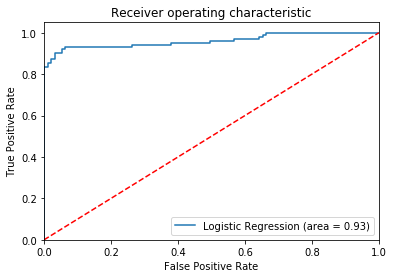

In [25]:
logit = LogisticRegression(random_state=44)

# train model
logit.fit(X_train, y_train)

#predictions
y_pred = logit.predict(X_test)

# make predicion(probabaility) on test set
pred = logit.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print("\n","<------------Confusion Matrix-------------------->")
print(conf_mat)

#Classification report
print("\n","<------------Classification Report--------------->")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
plt.figure()
logit_roc_auc = roc_auc_score(y_test, logit.predict(X_test))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("Receiver operating characteristic.png")
plt.show()

Confusion matrix, without normalization
[[90  5]
 [ 9 95]]


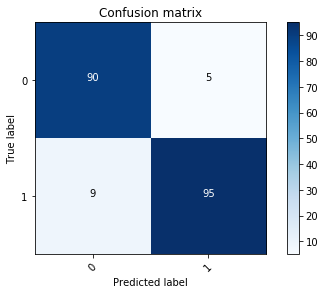

In [26]:
#ref:-
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/
#plot_confusion_matrix.html#confusion-matrix

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0, 1],title='Confusion matrix')
plt.savefig("Confusion_Matrix.png")

In [27]:

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense

Using TensorFlow backend.


In [28]:

scaler = StandardScaler()

scaler = scaler.fit(X_train)

X_trainS = scaler.transform(X_train)
X_testS = scaler.transform(X_test)

y_train = to_categorical(y_train, num_classes = 2)

In [29]:
# best model file path
filepath = "nn.pkl"

# callback 
Callback = [ModelCheckpoint(filepath = filepath,
                          monitor = 'val_loss',
                          verbose=1,
                          save_best_only = True,
                          save_weights_only=False,
                          mode='auto', period=1)]

In [38]:

# Neural network
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(2, activation = "softmax"))
model.compile(loss ='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
epochs = 120
batch_size = 16

In [40]:
# training model
history = model.fit(X_trainS, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split=0.1,callbacks = Callback)

Train on 713 samples, validate on 80 samples
Epoch 1/120
713/713 [==============================] - 1s 725us/step - loss: 0.4954 - acc: 0.8654 - val_loss: 0.3000 - val_acc: 0.9375

Epoch 00001: val_loss did not improve from 0.20294
Epoch 2/120
713/713 [==============================] - 0s 116us/step - loss: 0.2422 - acc: 0.9257 - val_loss: 0.1677 - val_acc: 0.9500

Epoch 00002: val_loss improved from 0.20294 to 0.16766, saving model to nn.pkl
Epoch 3/120
713/713 [==============================] - 0s 81us/step - loss: 0.1785 - acc: 0.9355 - val_loss: 0.2422 - val_acc: 0.9000

Epoch 00003: val_loss did not improve from 0.16766
Epoch 4/120
713/713 [==============================] - 0s 98us/step - loss: 0.1592 - acc: 0.9397 - val_loss: 0.1681 - val_acc: 0.9375

Epoch 00004: val_loss did not improve from 0.16766
Epoch 5/120
713/713 [==============================] - 0s 104us/step - loss: 0.1504 - acc: 0.9411 - val_loss: 0.1650 - val_acc: 0.9375

Epoch 00005: val_loss improved from 0.16766 t

713/713 [==============================] - 0s 90us/step - loss: 7.0258e-04 - acc: 1.0000 - val_loss: 0.3888 - val_acc: 0.9500

Epoch 00043: val_loss did not improve from 0.12675
Epoch 44/120
713/713 [==============================] - 0s 99us/step - loss: 6.4538e-04 - acc: 1.0000 - val_loss: 0.3899 - val_acc: 0.9375

Epoch 00044: val_loss did not improve from 0.12675
Epoch 45/120
713/713 [==============================] - 0s 97us/step - loss: 5.6916e-04 - acc: 1.0000 - val_loss: 0.3932 - val_acc: 0.9375

Epoch 00045: val_loss did not improve from 0.12675
Epoch 46/120
713/713 [==============================] - 0s 100us/step - loss: 5.7790e-04 - acc: 1.0000 - val_loss: 0.3966 - val_acc: 0.9375

Epoch 00046: val_loss did not improve from 0.12675
Epoch 47/120
713/713 [==============================] - 0s 98us/step - loss: 5.7949e-04 - acc: 1.0000 - val_loss: 0.3965 - val_acc: 0.9375

Epoch 00047: val_loss did not improve from 0.12675
Epoch 48/120
713/713 [==============================] - 0

713/713 [==============================] - 0s 86us/step - loss: 6.3772e-05 - acc: 1.0000 - val_loss: 0.4739 - val_acc: 0.9375

Epoch 00086: val_loss did not improve from 0.12675
Epoch 87/120
713/713 [==============================] - 0s 72us/step - loss: 6.3223e-05 - acc: 1.0000 - val_loss: 0.4747 - val_acc: 0.9375

Epoch 00087: val_loss did not improve from 0.12675
Epoch 88/120
713/713 [==============================] - 0s 73us/step - loss: 5.9372e-05 - acc: 1.0000 - val_loss: 0.4762 - val_acc: 0.9375

Epoch 00088: val_loss did not improve from 0.12675
Epoch 89/120
713/713 [==============================] - 0s 85us/step - loss: 5.6543e-05 - acc: 1.0000 - val_loss: 0.4775 - val_acc: 0.9375

Epoch 00089: val_loss did not improve from 0.12675
Epoch 90/120
713/713 [==============================] - 0s 71us/step - loss: 5.4792e-05 - acc: 1.0000 - val_loss: 0.4795 - val_acc: 0.9375

Epoch 00090: val_loss did not improve from 0.12675
Epoch 91/120
713/713 [==============================] - 0s

In [41]:

model = load_model(filepath)

In [42]:
y_pred = np.argmax(model.predict(X_testS),axis=1)

print(f"Accuracy of nn is: {accuracy_score(y_pred, y_test)*100}%")

Accuracy of nn is: 94.9748743718593%


In [43]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_testS, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

199/199 [==============================] - 0s 40us/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.99      0.91      0.95       104

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 34        
Total params: 5,682
Trainable params: 5,682
Non-trainable params: 0
_________________________________________________________________
